In [14]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import hazm

In [2]:

def create_output(output_type, marker, span):
    return {"type":output_type, "marker":marker, "span":repr(span)}

In [3]:
import re


class Symbolizer:
    def __init__(self):
        self.symbols = []
        with open('namad.txt') as symbols_file:
            line = symbols_file.readline()
            while line:
                n = line.split('\t')
                self.symbols.append(n[0])
                # TODO: we can add more information to a symbol here
                # namad_description.append(n[1])
                line = symbols_file.readline()

    def symbolize(self, sentence):
        output = []
        for namad in self.symbols:
            for m in re.finditer(namad, sentence):
                output.append(create_output("نماد", namad, m.span()))
        return output

In [13]:
events = [
    "مثبت",
    "سود",
    "صعود",
    "افزایش",
    "کاهش",
    "رشد",
    "ریزش",
    "عرضه",
    "افشا",
    "اصلاح",
    "نزول",
]


In [10]:
def event_extractor(noun_phrase):
    output=[]
    for event in events:
        for m in re.finditer(event, noun_phrase.group()):
                output.append(create_output("واقعه", noun_phrase.group()[1:-3], noun_phrase.span()))
    return output


In [14]:
def get_phrase(tagged_str, phrase="NP"):
    # for b in  re.finditer(r"\[[آ-یء چ]+NP\]", a):
    phrases = []
    for b in re.finditer(rf"\[[^\]]*{phrase}\]", tagged_str):
        phrases.append(b.group())
        extracted_event = event_extractor(b)
        if extracted_event:
            print('event ectracted: ')
            print(extracted_event)
    return phrases


In [21]:
sentences = [
    "ارزش سهام شرکت نفت کاهش یافت",
    "قرارداد با آمریکا باعث افت قیمت سهم وغدیر شد",
    "ریزش بازار به دلیل حمله‌ی روسیه است.",
    "فک کنم یه اصلاح قیمتی و کمی ریزش داشته باشیم.",
    "یک نکته‌ی تکنیکالی هم در صورت دستکاری نشدن اضافه کنم، کندلی که روز سه شنبه‌ی گذشته ثبت کرد کامل است",
    "روز چهارشنبه یه دفعه برای خودشون افشا زدن",
    "رشد قیمت‌ها باعث ایجاد صف خرید در سهم پرشیا شد",
    "شاخص به ۲ میلیون می‌رسه",
    "آمریکا باعث ریزش بازار شد",
    "آمریکا موجب ریزش بازار شد",
    "آمریکا دلیل ریزش بازار شد",
    "کاهش قیمت سهم عجیب بود",
    "قیمت زیاد شد",
    "قیمت زیاد است",
    "سهم قیمتش پایین است",
    "حضور تو موجب خوشحالی من در هوای بارانی است",
]
tagger = hazm.POSTagger(model="../resources/postagger.model")
chunker = hazm.Chunker(model="../resources/chunker.model")
for sentence in sentences:
    print("-------------")
    print(sentence)
    print("symbols: ")
    symbolizer = Symbolizer()
    output = symbolizer.symbolize(sentence)
    if output:
        print(output)

    tagged = tagger.tag(hazm.word_tokenize(sentence))
    print("tagged: ")
    print(tagged)
    chunked_str = hazm.tree2brackets(chunker.parse(tagged))
    print("chukned: ")
    print(chunked_str)
    get_phrase(chunked_str, phrase="NP")


-------------
ارزش سهام شرکت نفت کاهش یافت
symbols: 
tagged: 
[('ارزش', 'Ne'), ('سهام', 'Ne'), ('شرکت', 'Ne'), ('نفت', 'N'), ('کاهش', 'N'), ('یافت', 'V')]
chukned: 
[ارزش سهام شرکت نفت NP] [کاهش یافت VP]
-------------
قرارداد با آمریکا باعث افت قیمت سهم وغدیر شد
symbols: 
[{'type': 'نماد', 'marker': 'وغدیر', 'span': '(36, 41)'}]
tagged: 
[('قرارداد', 'N'), ('با', 'P'), ('آمریکا', 'N'), ('باعث', 'AJe'), ('افت', 'Ne'), ('قیمت', 'Ne'), ('سهم', 'N'), ('وغدیر', 'AJ'), ('شد', 'V')]
chukned: 
[قرارداد NP] [با PP] [آمریکا NP] [باعث افت قیمت سهم وغدیر ADJP] [شد VP]
-------------
ریزش بازار به دلیل حمله‌ی روسیه است.
symbols: 
tagged: 
[('ریزش', 'Ne'), ('بازار', 'N'), ('به', 'P'), ('دلیل', 'Ne'), ('حمله\u200cی', 'Ne'), ('روسیه', 'N'), ('است', 'V'), ('.', 'PUNC')]
chukned: 
[ریزش بازار NP] [به PP] [دلیل حمله‌ی روسیه NP] [است VP] .
event ectracted: 
[{'type': 'واقعه', 'marker': 'ریزش بازار ', 'span': '(0, 15)'}]
-------------
فک کنم یه اصلاح قیمتی و کمی ریزش داشته باشیم.
symbols: 
tagged: 
[('فک', 

In [3]:
import hazm
from __future__ import unicode_literals
tagger = hazm.POSTagger(model='../resources/postagger.model')
print(tagger.tag(hazm.word_tokenize('ما بسیار کتاب می‌خوانیم'))[3][0])
# tagger.tag(hazm.word_tokenize('ما بسیار کتاب می‌خوانیم'))
tagger.tag(hazm.word_tokenize('کتاب خواندن را دوست داریم'))
tagger.tag(hazm.word_tokenize('من درخت بلند را دیدم'))
tagger.tag(hazm.word_tokenize('مرد زبان نفهم'))
tagger.tag(hazm.word_tokenize('مرد سود ده'))

می‌خوانیم


[('مرد', 'Ne'), ('سود', 'Ne'), ('ده', 'NUM')]

In [4]:
word = 'کتاب خواندن را دوست داریم'
word = '۵ گل زیبا خریدم'
word = 'سهام ۳ واحد افزایش یافت'
word = 'هوا ۵ درجه گرم شد'
chunker = hazm.Chunker(model='../resources/chunker.model')
chunker = hazm.RuleBasedChunker()
tagged = tagger.tag(hazm.word_tokenize(word))
print(chunker.parse(tagged))
print(hazm.tree2brackets(chunker.parse(tagged)))
chunker.parse(tagged).draw()

(S (NP هوا/N) (NP ۵/NUM درجه/N) (ADJP گرم/AJ) (VP شد/V))
[هوا NP] [۵ درجه NP] [گرم ADJP] [شد VP]


In [ ]:
import nltk

nltk.ChunkParserI('a big cat was dead')

In [40]:
lst = [u'\u200c', u'\u5de5', 'ب\u200cر', 'امی‌ن']
print(lst)
print('امی\u200cن')
print('امی‌ن')

['\u200c', '工', 'ب\u200cر', 'امی\u200cن']
امی‌ن
امی‌ن


In [55]:
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /home/amin/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai

In [85]:
# nltk.download('punkt')
# nltk.download('popular')
# nltk.download('universal_tagset')
# text = nltk.word_tokenize("He is a good, tall boy")
text = nltk.word_tokenize("He is a little tall boy")
# text = nltk.word_tokenize("the little crazy cat sat on the mat")
# text = nltk.word_tokenize("amin is clever and good boy")
# text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text, tagset='universal')
# nltk.pos_tag(text)

[('He', 'PRON'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('little', 'ADJ'),
 ('tall', 'ADJ'),
 ('boy', 'NOUN')]

In [78]:
unchunked_sent = 'the little cat sat on the mat'
rule1 = nltk.chunk.regexp.ChunkRule('<NN|DT>+',
    'Chunk sequences of NN and DT')
chunkparser = nltk.chunk.regexp.RegexpParser( [rule1] )
chunkparser.parse(unchunked_sent)

TypeError: Expected string or list of RegexpChunkParsers for the grammar.

In [91]:
import nltk
text = "learn php from guru99"
text = 'the little crazy cat is sitting on the mat'
tokens = nltk.word_tokenize(text)
print(tokens)
tag = nltk.pos_tag(tokens)
print(tag)
grammar = """
NP: {<DT>?<JJ>*<NN>} 
VP: {<VB.?>*}
"""
cp  = nltk.RegexpParser(grammar)
result = cp.parse(tag)
print(result)
result.draw()    # It will draw the pattern graphically which can be seen in Noun Phrase chunking 

['the', 'little', 'crazy', 'cat', 'is', 'sitting', 'on', 'the', 'mat']
[('the', 'DT'), ('little', 'JJ'), ('crazy', 'JJ'), ('cat', 'NN'), ('is', 'VBZ'), ('sitting', 'VBG'), ('on', 'IN'), ('the', 'DT'), ('mat', 'NN')]
(S
  (NP the/DT little/JJ crazy/JJ cat/NN)
  (VP is/VBZ sitting/VBG)
  on/IN
  (NP the/DT mat/NN))


(دختر ۵ خوب)
None


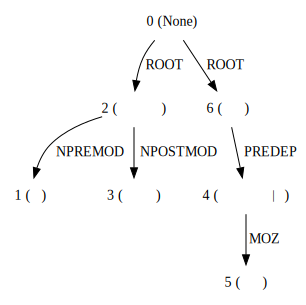

In [6]:
text = 'زنگ‌ها برای که به صدا درمی‌آید؟' 
text = ' ۵ دختر خوب مدرسه‌ی ما گل'
# text = 'گل باغ شهر ما'
# text = '۳ سگ وحشی زشت علی زیبا به دریا رفتند.'
# text = 'گل زیبای خانه‌ی مادربزرگ من'
# text = 'سهام ۳ واحد افزایش یافت'
tagger = hazm.POSTagger(model='../resources/postagger.model')
lemmatizer = hazm.Lemmatizer()
parser = hazm.DependencyParser (tagger = tagger, lemmatizer = lemmatizer, working_dir='../resources')
print(parser.parse (  hazm.word_tokenize(text)).tree().pprint())
parser.parse (  hazm.word_tokenize(text))

استفاده از FIS روی توییت ها 
افعال مثبت و منفی و کلمات و متفی در تنفی مثبت و اینا
فراکاپ
فرق گشتن دنبال keywordها در NP و VP
یه کلمه‌ی مثل افت توی ADJP هم مهمه باید بررسی کنیم.